# Statistical Analysis + ML Learning Methods
## Data Group 1 (MEMS DESIGN DATA)

Author: Yahriel Salinas-Reyes

## Importing basic, statistics, and machine learning packages

In [74]:
# Basic packages
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # data manipulation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors      

# Makes some plots look nicer
import seaborn as sns

# Statistical packages
import statsmodels.api as sm
from statsmodels.formula.api import ols   # ordinary least squares model 
import statsmodels.stats.multicomp        # option for ANOVA, not used yet

# The machine learning modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve 
from sklearn import svm
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn import preprocessing # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data

In [75]:
# Read In Data
df = pd.read_csv("MEMS Design Data Paper.csv")
# Get the data into a pandas dateframe.  
#df = pd.read_csv('Yaya.csv', 
#                 header=1, ## NOTE: The second line contains column names, so we skip the first line
#                 sep='\t') ## NOTE: Pandas automatically detects delimeters, but it never hurts to be specific
#df.drop('Group', axis=0, inplace=True) ## set axis=0 to remove rows, axis=1 to remove columns
#df.drop(columns=['Group', 'Set', 'AbsJ', 'J', 'I', 't', 'R'])
#df.drop(columns=['Group'])

df.head()



,Group,Set,ID,B Area,B Length,B Thickness,PR (nu),R Area,R Length,R Location,Contacts,dR/dX,GF,dR/R_0,Strain,nR
0,1.0,1.0,7H,642.0,64.2,0.26,0.5,46.25,8.0,0.0,FM,0.000400,0.028253,4.797980,0.169822,6.79288
1,1.0,1.0,7I,592.0,59.2,0.26,0.5,46.25,8.0,0.0,FM,0.000606,0.029013,5.384615,0.185593,7.42372
2,1.0,1.0,7J,542.0,54.2,0.26,0.5,46.25,8.0,0.0,FM,0.001250,0.032690,6.692407,0.204722,8.18888
3,1.0,1.0,7K,492.0,49.2,0.26,0.5,46.25,8.0,0.0,FM,0.001130,0.029721,6.789649,0.228443,9.13772
4,1.0,1.0,7A,442.0,44.2,0.26,0.5,46.25,8.0,0.0,FM,0.001800,0.030835,7.575758,0.245687,9.82748


- **Group**, Experimental Group Data
- **Set**, Data Set
- **ID**, Sample ID
- **B Area**, Paper Beam Surface Area
- **B Thickness**, Paper Beam Thickness
- **PR(nu)**, Poission's Ratio of Substrate Material
- **R Area**, Resistor Cross-Sectional Area
- **R Length**, Resistor Length
- **R Location**, Resistor Location Along Beam
- **Contacts**, FM or SP Contact Pads
- **dR/dX**, Change in R/Change in X
- **GF**, Gauage Factor of Sensor
- **dR/R_0**, Relative Change in R
- **Strain**, Strain Along Beam
- **nR**, Normalized Strain Measurement



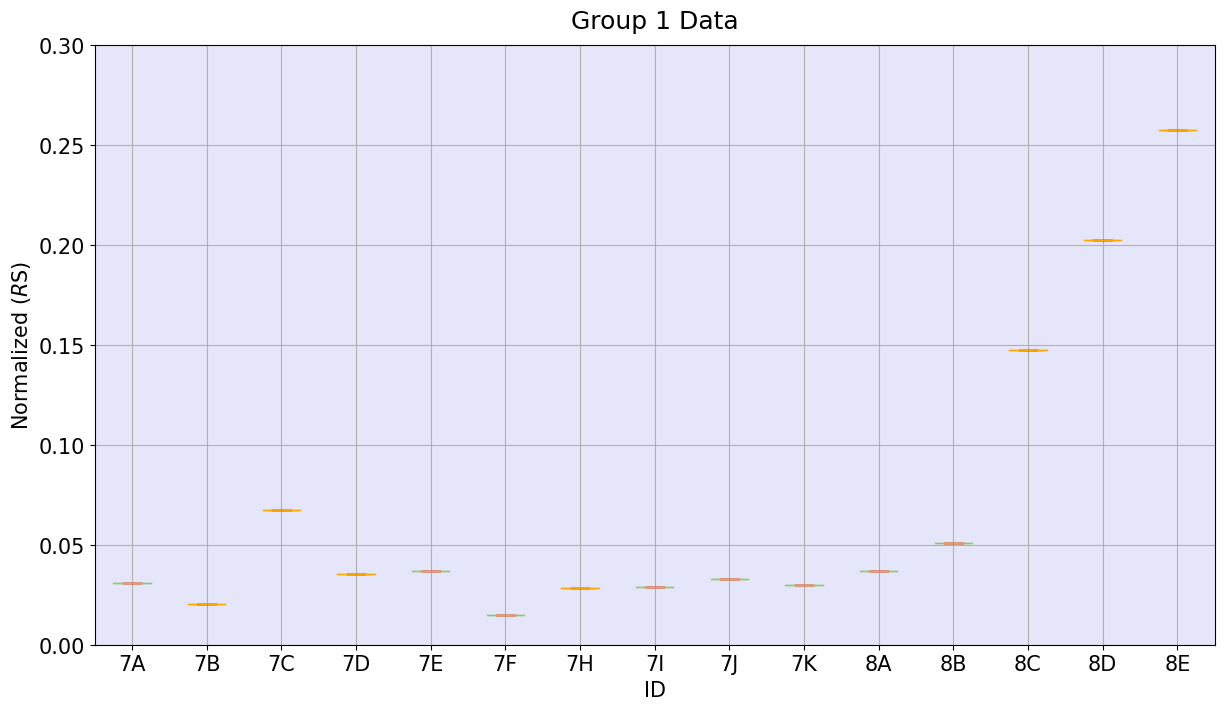

In [76]:

# this makes a box plot sorted by experiment
# boxplot is an axes object
# It was a hassle to figure out how to edit the colors for the boxes
# Turning on patch_artist applies some default colors 

boxplot = df.boxplot('GF', by='ID', vert=True, patch_artist=True,   
            boxprops=dict(facecolor='red', color='cyan'), # doesn't work 
            capprops=dict(color='red'),                   # works
            whiskerprops=dict(color='red'),               # doesn't work
            medianprops=dict(color='orange'),             # does not work
            figsize=(14,8))                               # works

fig = boxplot.get_figure()                                # a work around to get rid of annoying auto-title
fig.suptitle('')

boxplot.patch.set_facecolor('lavender')         # Changes plot background
# plt.style.use('seaborn') # Does not do anything

plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
font = {'size': 15}
plt.xlabel('ID', font)
plt.ylabel(r'Normalized ($R$S)', font)
plt.ylim(0,0.3)
plt.title('Group 1 Data', fontsize=18, pad = 12)
plt.show()

In [77]:
df.drop('PR (nu)', axis=1, inplace=True) ## set axis=0 to remove rows, axis=1 to remove columns
df.drop('R Area', axis=1, inplace=True) ## set axis=0 to remove rows, axis=1 to remove columns
df.drop('R Length', axis=1, inplace=True) ## set axis=0 to remove rows, axis=1 to remove columns
df.drop('R Location', axis=1, inplace=True) ## set axis=0 to remove rows, axis=1 to remove columns
df.drop('Contacts', axis=1, inplace=True) ## set axis=0 to remove rows, axis=1 to remove columns
df.drop('nR', axis=1, inplace=True) ## set axis=0 to remove rows, axis=1 to remove columns
df.head()
df['B Area'].astype(np.int64)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer